# Rotten Tomatoes Ratings - A gathering data project

We will use read_csv to import the tsv file, read_csv pandas function can be used to read multiple types of flat files.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import unicodedata 
%matplotlib inline

In [2]:
df_1 = pd.read_csv('bestofrt.tsv', sep = "\t")
df_1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## Webscraping from Rotten Tomatoes website
Webscraping means extracting data from websites using code. We will be downloading the rotten tomatoes page, which is basically a HTML file and then parse it to extract the data using Python Beautiful Soup library.

In [3]:
#import beautiful soup
from bs4 import BeautifulSoup

In [4]:
#open a html file- using et for ref here
with open("rt_html/et_the_extraterrestrial.html") as file:
    soup = BeautifulSoup(file, "lxml") #use beautiful soup constructor to open the file, lxml is the parser

In [5]:
#view the parsed html file
soup

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

In [6]:
#Find method to find a certain tag
soup.find('title'),soup.find('audience_score') , soup.find('number_of_audience_ratings')

(<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>,
 None,
 None)

In [7]:
#access the contents inside the tag contents(), also slice the string and remove rotten tomattoes
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. The Extra-Terrestrial\xa0(1982)'

In [8]:
#try removing \xa01982 from title
title1=soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
title1 = unicodedata.normalize("NFKD", title1)
print(title1)

E.T. The Extra-Terrestrial (1982)


In [9]:
len(' - Rotten Tomatoes')

18

<li>Creates an empty list, df_list, to which dictionaries will be appended. This list of dictionaries will eventually be converted to a pandas DataFrame (this is the most efficient way of building a DataFrame row by row).
<li>Loops through each movie's Rotten Tomatoes HTML file in the rt_html folder.
<li>Opens each HTML file and passes it into a file handle called file.
<li>Creates a DataFrame called df by converting df_list using the pd.DataFrame constructor.
<p>The task here is to extract the title, audience score, and number of audience ratings in each HTML file so each trio can be appended as a dictionary to df_list.</p>

In [10]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        soup = BeautifulSoup(file, "lxml")
        
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        #try removing \xa01982 from title
        title = unicodedata.normalize("NFKD", title)
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        #extract the div tag that has user ratings and then remove the commas
        num_audience_ratings=soup.find('div',class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
       
        # Note: a correct implementation may take ~15 seconds to run
        df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])       
        

In [11]:
df.head()

,title,audience_score,number_of_audience_ratings
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533


## Merge df and df_1

In [12]:
df.shape, df_1.shape

((100, 3), (100, 4))

In [13]:
# do a left join on the main dataset df_1 on title
df_combined= pd.merge(df,df_1, how='left', on='title') 
df_combined.head()

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
0,Zootopia (2016),92,98633,44.0,98.0,249.0
1,The Treasure of the Sierra Madre (1948),93,25627,51.0,100.0,45.0
2,All Quiet on the Western Front (1930),89,17768,56.0,100.0,40.0
3,Rear Window (1954),95,149458,36.0,100.0,63.0
4,Selma (2015),86,60533,37.0,99.0,236.0


In [14]:
df_combined.shape

(100, 6)

In [15]:
#Look at the combined dataset as a whole
df_combined.describe()

,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
count,100.000000,1.000000e+02,97.000000,97.000000,97.000000
mean,89.680000,8.381505e+05,50.268041,97.917526,142.329897
std,5.314132,4.604139e+06,29.234154,2.182650,113.028455
min,72.000000,6.128000e+03,1.000000,92.000000,40.000000
25%,87.000000,3.526425e+04,25.000000,97.000000,54.000000
50%,90.000000,6.336600e+04,50.000000,98.000000,75.000000
75%,94.000000,2.118585e+05,75.000000,100.000000,256.000000
max,98.000000,3.335567e+07,100.000000,100.000000,370.000000


## How do the ratings look like on cleaned data

Use the combined dataframe and create the visualizations.

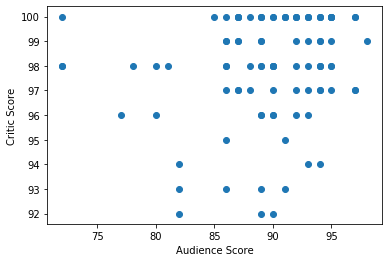

In [16]:
plt.scatter(df_combined.audience_score, df_combined.critic_score);
plt.xlabel('Audience Score')
plt.ylabel('Critic Score');

The above chart does not make too much sense, I cannot tell which movie lands where. I'll import the data in Tableau and create an almost fancy chart.

In [17]:
#export the df_Combined dataset into a csv
df_combined.to_csv('rt_combined.csv',index=False)

Created the below visual in Tableau, it shows how movies rate Critics score vs Audience score. The gray lines represent the median ratings for each axes. 
<li>The movies in the 1st quadrant are those that are extremely high rated by the critics but low by audience. That makes sense, I never liked "The Babadook" at all. Its just a hyped movie for nothing.</li>
<li>The movies in the 2nd quadrant are the ones that are rated high on critics as well as audience's scores. The Godfather, Seven Samurai must be very nice movies, and I haven't watched any of them.</li>
<li>The movies in the 3rd quadrant are lower on both the scores.</li>
<li>The movies in the 4th quadrant are basically the popular movies. </li>

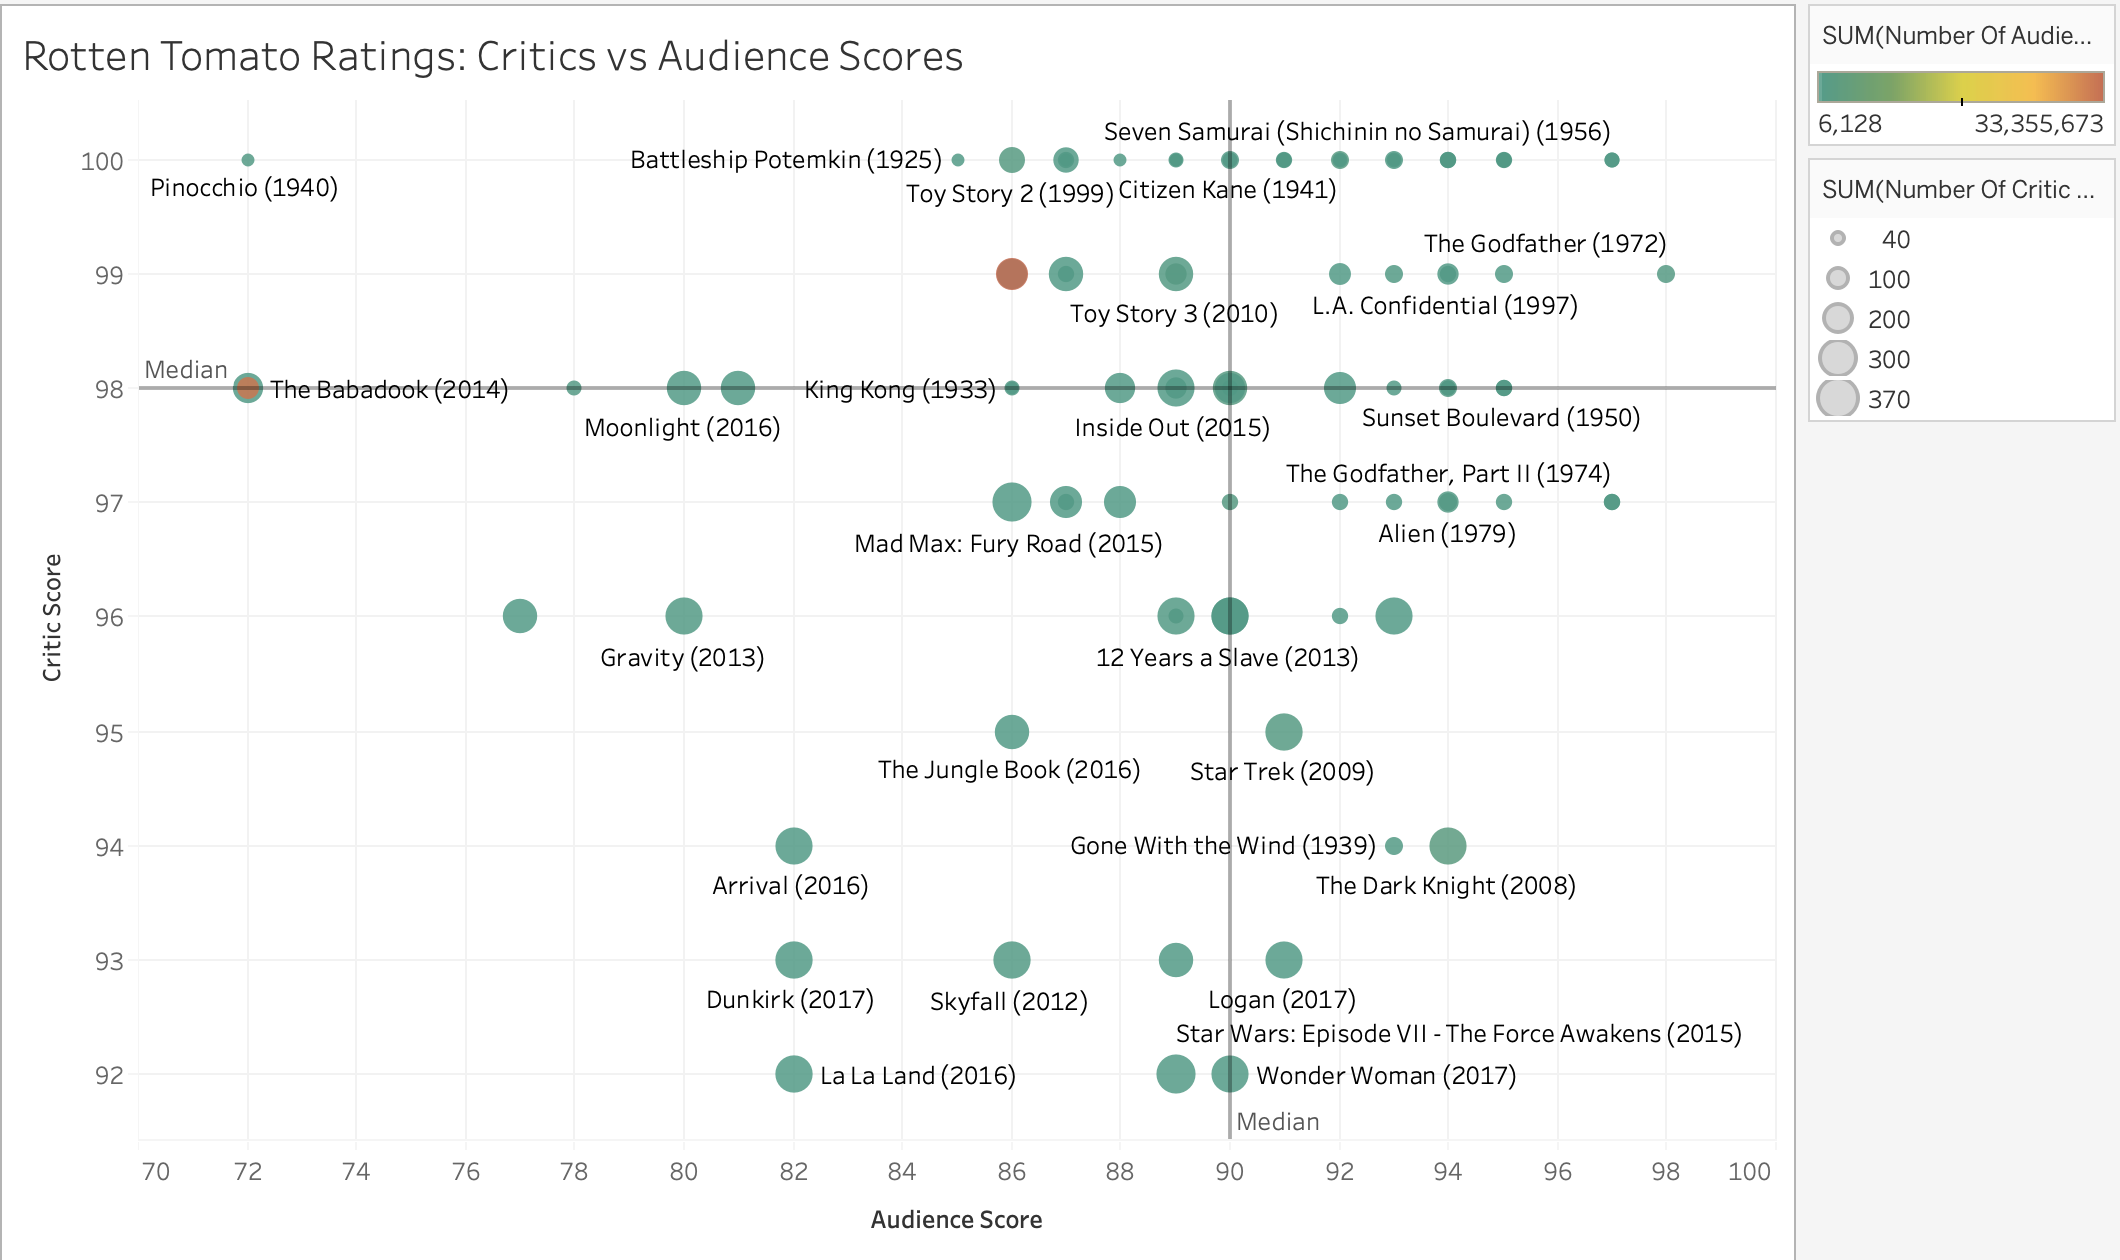

## Gathering data directly from the internet using HTTP
In the previous sections, we were given the downloaded html files and we just did web-scraping on those files. In this section we will try to gather data directly from the internet using Python **Requests** library.

In [18]:
import requests
import os

###  Import files from the listed URLs

In [19]:
folder_name = 'ebert_reviews'
#if the folder name does not exist then create the folder
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [20]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

Go over all the URLs in the given list and download from each of them and write to new files.
Write the file using 'wb' mode i.e., write binary because the response.content is binary and not text yet.

In [21]:
for url in ebert_review_urls:
    response= requests.get(url) 
    #print(response) # returns <Response [200]>, that means HTTP 200 Ok status
    #Store the response in a file, file name should be the last string in the url, mode='wb' 
    with open(os.path.join(folder_name, 
                          url.split('/')[-1]), mode = 'wb') as file:
            file.write(response.content)# once the file is created, write the response.content
            #print(os.listdir(folder_name)) # show the contents of the folder to check if file was created

Check if the files were downloaded correctly

In [22]:
import filecmp
#dc = filecmp.dircmp('ebert_reviews', 'ebert_reviews_solution')# I do not have the solution folder so it will throw an error
#assert len(dc.common) == 88

## Gather data from the files downloaded 
We will use **glob library** to gather data from the files we have downloaded from internet in the previous section. In Python, gathering data entails opening and reading files. It can be done in two ways : using **OS library** and, using **glob library**. Glob library allows unix-style file path pattern.

In [23]:
## using os library opne method
folder = 'ebert_reviews'
for ebert_review in os.listdir(folder):
    with open(os.path.join(folder,ebert_review)) as file:
        print(ebert_review)
        break
        ## other code here

26-dunkirk-2017-film.txt


Use glob to access the files using unix like file pattern. When using open() always specify the encoding. We need to find which encoding is used in the web pages we downloaded. So go to one of those webpages, look at the HTML source code, and we see that the encoding is UTF, see below screenshot from the source code of a movie review from Roger Ebert's website. The text file is separated by new line characters so we will read the file line by line and separately store the title, url and the review content.

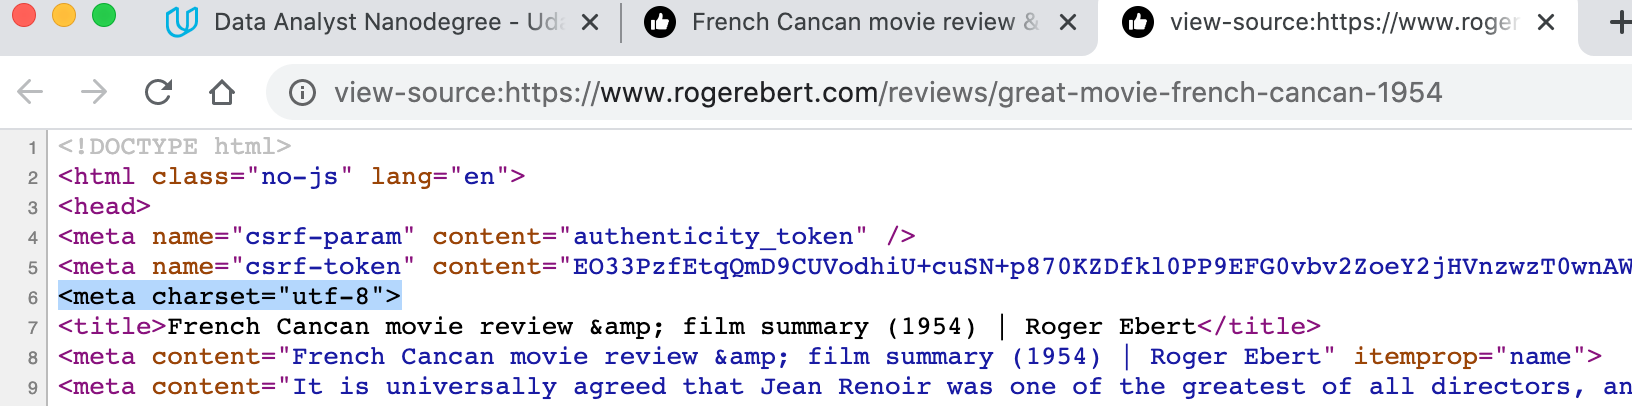

In [27]:
## using glob library
import glob
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

for ebert_review in glob.glob('ebert_reviews/*.txt'):
    #print(ebert_review)
    with open(ebert_review, encoding = 'utf-8' ) as file:
        #print(file.read())
        title = file.readline()[:-1]
        review_url=file.readline()[:-1]
        review_text= file.read()
        #print(review_text)
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'review_url': review_url,
                        'review_text': review_text})
df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])

### Solution test
The below should not give any Assertion error if the solution is correct.

In [28]:
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)